In [2]:
def setup():
    f = open('votesmart_20bill.txt', 'r')
    condensed={}
    rollup=set()
    key="NAN"
    for line in f:
        line=line.replace("a","")
        line=line.replace("(","")
        line=line.replace("\r","")
        line=line.replace("\n","")

        #if l its a new person
        if line[0]=="l":
            if key!="NAN":
                condensed[key]=frozenset(rollup)
            key=line
            rollup=set()

        #if I its a bill and needs to be rolled up
        elif line[0]=="I":
            rollup.add(int(line[1:]))

    return condensed

def meaning():
    meaning={}
    f = open('votesmart_20bill_meaning.txt', 'r')
    value="NAN"
    for line in f:
        line=line.replace("\r","")
        line=line.replace("\n","")
        
        # if a or aS its a tag
        if line[0]=="S" or line[0]=="a":
            line=line.replace("\\","")
            line=line.replace("'","")
            line=line.replace("\"","")
            
            if line[0]=="a":
                line=line[2:]
            else:
                line=line[1:]
       
            value=line
            
        #if its a p its a bill
        elif line[0]=="p":
            meaning[int(line[1:])]=value
            
#         print line
    return meaning

In [8]:
#FLAWED IMPLEMENTATION OF APRIORI
# import pprint as pp
# import itertools

def make_singletons(data):
    uniqs=set()
    for person, vote_set in data.iteritems():
        uniqs.update(vote_set)
        singletons=map((lambda x:frozenset([x])),uniqs)
    return singletons

print (make_singletons(setup()))

# def calc_support(data,sets):
#     supp_dict={}
#     for person,votes in data.iteritems():
#         for bag in sets:
#             if bag <= votes:
#                 if bag in supp_dict:
#                     supp_dict[bag]+=1
#                 else:
#                     supp_dict[bag]=1
#     supp_dict = {k: v/float(len(data)) for k, v in supp_dict.iteritems()}
#     return supp_dict

# def cut_on_support(supp_dict,min_support):
#     frequent=[]
#     for votes, supp in supp_dict.iteritems():
#         if supp>=min_support:
#             frequent.append(votes)
#     return frequent

# def scanD(data,sets,min_support):
#     calc_support
#     return 

# def gen_next_layer(prev_layer,k):
#     retList = []
#     lenLk = len(prev_layer)
# #     k=len(get_item(prev_layer))
#     for i in range(lenLk):
#         for j in range(i+1, lenLk):
#             L1 = list(prev_layer[i])[:k-2]; L2 = list(prev_layer[j])[:k-2]
#             L1.sort(); L2.sort()
#             if L1==L2:
#                 retList.append(prev_layer[i] | prev_layer[j])
#     return retList

# def apriori(data,min_supp):
#     all_freqs=[]
#     singletons=make_singletons(data)
#     layer=singletons
#     supp=calc_support(data,layer)
#     frequent=cut_on_support(supp,min_supp)
#     k=1
#     while len(layer)>1:
        
#         layer=gen_next_layer(frequent,k)
#         supp=calc_support(data,layer)
#         frequent=cut_on_support(supp,min_supp)
#         pp.pprint(frequent)
#         all_freqs.append(frequent)
#         k+=1
# #     return all_freqs
    
# def partA():
# #     data=setup()
# #     data={1:1,2:2,3:3,4:4,5:5,6:6}
# #     new_data = {k: frozenset([v]) for k, v in data.iteritems()}
# #     layer=make_singletons(new_data)
# # # #     pp.pprint (layer)
# #     layer2=gen_next_layer(layer,2)
# # # #     pp.pprint (layer2)
# #     layer3=gen_next_layer(layer2,3)
# #     pp.pprint (layer3)
# #     layer4=gen_next_layer(layer3)
# #     pp.pprint (layer4)
# #     singletons=make_singletons(data)
# #     pp.pprint(singletons)
# #     pp.pprint(gen_next_layer(singletons))
# #     supp=calc_support(data,singletons)
# #     L=cut_on_support(supp,.5)
# #     apriori(setup(),.4)
#     pp.pprint(apriori(setup(),.4))
# partA()

[frozenset([0]), frozenset([1]), frozenset([2]), frozenset([3]), frozenset([4]), frozenset([5]), frozenset([6]), frozenset([7]), frozenset([8]), frozenset([9]), frozenset([10]), frozenset([11]), frozenset([12]), frozenset([13]), frozenset([14]), frozenset([15]), frozenset([16]), frozenset([17]), frozenset([20]), frozenset([21]), frozenset([22]), frozenset([23]), frozenset([24]), frozenset([25]), frozenset([26]), frozenset([27]), frozenset([28]), frozenset([29])]


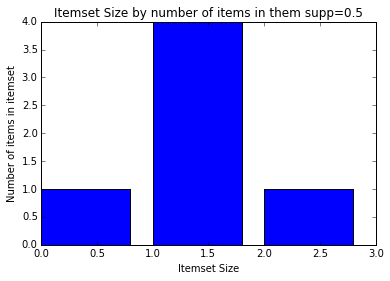

{0: 1, 1: 4, 2: 1}
5
--------------------


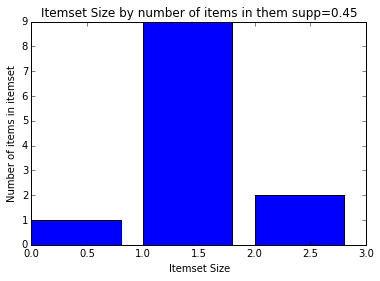

{0: 1, 1: 9, 2: 2}
11
--------------------


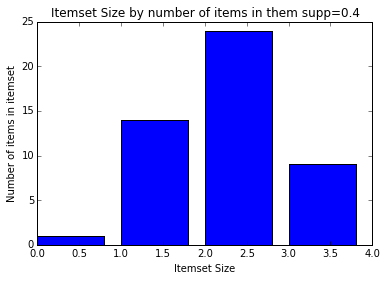

{0: 1, 1: 14, 2: 24, 3: 9}
47
--------------------


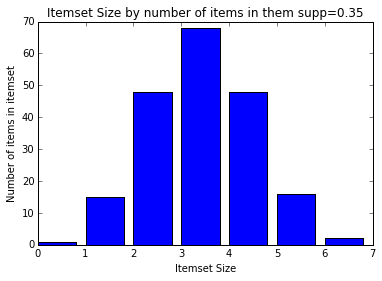

{0: 1, 1: 15, 2: 48, 3: 68, 4: 48, 5: 16, 6: 2}
197
--------------------


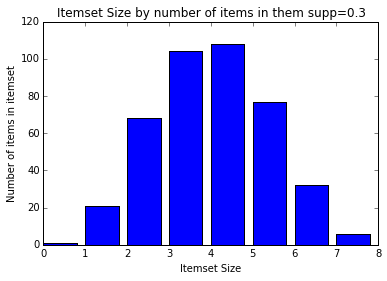

{0: 1, 1: 21, 2: 68, 3: 104, 4: 108, 5: 77, 6: 32, 7: 6}
416
--------------------
[(frozenset([15]), frozenset([1]), 0.9615384615384616),
 (frozenset([1]), frozenset([15]), 0.8272058823529412),
 (frozenset([15]), frozenset([21]), 0.8974358974358975),
 (frozenset([22]), frozenset([1]), 0.9513513513513513),
 (frozenset([3]), frozenset([25]), 0.9429824561403509),
 (frozenset([25]), frozenset([3]), 0.8022388059701493),
 (frozenset([17]), frozenset([1]), 0.8703703703703703),
 (frozenset([1]), frozenset([17]), 0.8639705882352942),
 (frozenset([29]), frozenset([1]), 0.9813084112149533),
 (frozenset([1]), frozenset([29]), 0.7720588235294119),
 (frozenset([17]), frozenset([21]), 0.9296296296296296),
 (frozenset([25]), frozenset([0]), 0.8395522388059702),
 (frozenset([0]), frozenset([25]), 0.7867132867132867),
 (frozenset([7]), frozenset([26]), 0.8492063492063493),
 (frozenset([26]), frozenset([7]), 0.7615658362989325),
 (frozenset([3]), frozenset([9]), 1.0),
 (frozenset([9]), frozenset([3]), 0.

In [3]:
import matplotlib.pyplot as pyplot
import pprint as pp
import numpy as np
%matplotlib inline  

# FROM HARRINGTON
def createC1(dataSet):
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return map(frozenset, C1)
def scanD(D, Ck, minSupport):
    ssCnt = {}
    for tid in D:
        for can in Ck:
            if can.issubset(tid):
                if not ssCnt.has_key(can): ssCnt[can]=1
                else: ssCnt[can] += 1
    numItems = float(len(D))
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[key]/numItems
        if support >= minSupport:
            retList.insert(0,key)
        supportData[key] = support
    return retList, supportData



def aprioriGen(Lk, k): #creates Ck
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk):
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2:
                retList.append(Lk[i] | Lk[j])
    return retList

def apriori(dataSet, minSupport = 0.5):
    C1 = createC1(dataSet)
    D = map(set, dataSet)
    L1, supportData = scanD(D, C1, minSupport)
    L = [L1]
    k = 2
    while (len(L[k-2]) > 0):
        Ck = aprioriGen(L[k-2], k)
        Lk, supK = scanD(D, Ck, minSupport)
        supportData.update(supK)
        L.append(Lk)
        k += 1
    return L, supportData

def generateRules(L, supportData, minConf=0.7):
    bigRuleList = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq]
        if conf >= minConf:
#             print freqSet-conseq,'-->',conseq,'conf:',conf
            brl.append((freqSet-conseq, conseq, conf))
            prunedH.append(conseq)
    return prunedH

def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

def report(L):
    report={0:1}
    for layer in L:
        if len(layer)>0:
            report[len(layer[0])]=len(layer)
    return report
        
def partB():
    for i in [.5,.45,.4,.35,.3]:     
        data=setup().values()
        L,suppData=apriori(data,minSupport=i)
#         pp.pprint(L)
        the_report=report(L)
        pyplot.bar(the_report.keys(),the_report.values())
        pyplot.xlabel('Itemset Size')
        pyplot.ylabel('Number of items in itemset')
        pyplot.title('Itemset Size by number of items in them supp='+str(i))
        pyplot.show()
        pp.pprint(the_report)
        pp.pprint(sum(the_report.values())-1)
        print("--------------------")
#         print(len([[1,2,3],[2,3,4]]))
#         break
#     rules= generateRules(L,suppData, minConf=.99)
#     pp.pprint(rules)
def partC():
    data=setup().values()
    L,suppData=apriori(data,minSupport=.3)
    for i in np.linspace(.7,.99,5):
        rules= generateRules(L,suppData, minConf=i)
#         pretty_print(rules[-1])
#         break
        pp.pprint(rules)
        print("--------------------")
        print(i)
partB()
partC()

In [17]:
# (frozenset([3, 26]), frozenset([0, 9], 1.0),
#  (frozenset([3, 25]), frozenset([0, 9]), 0.9953488372093025),
#  (frozenset([3, 4, 7, 23]), frozenset([0, 9]), 0.9950980392156863),
#  (frozenset([3]), frozenset([0]), 0.9956140350877194),
#  (frozenset([3, 4]), frozenset([0, 9]), 0.9953488372093025),
#  (frozenset([3, 23]), frozenset([0, 9]), 0.9954545454545454), 
# (frozenset([15]), frozenset([1, 11]), 0.923076923076923),
# Need to find look ups for 0,3,4,7,9,23,25,26
lookup=meaning()
for num in [0,1,2,3,4,7,8,9,11,13,15,17,21,23,25,26,29]:
    # Turns out there is a +1 shift from dataset to meaning dataset
#     lookup[num+1]
    pp.pprint(str(num)+" "+lookup[num+1])




'0 Republican'
'1 Democratic'
'2 Prohibiting Federal Funding of National Public Radio -- Nay'
'3 Prohibiting Federal Funding of National Public Radio -- Yea'
'4 Removing Troops from Afghanistan -- Nay'
'7 Terminating the Home Affordable Modification Program -- Yea'
'8 Repealing the Health Care Bill -- Nay'
'9 Repealing the Health Care Bill -- Yea'
'11 Science and Technology Funding -- Yea'
'13 Whistleblower Protection for Offshore Oil Workers -- Yea'
'15 Repealing Dont Ask, Dont Tell After Military Review and Certification -- Yea'
'17 Unemployment Benefits Extension -- Yea'
'21 Prohibiting 2010- 2011 Congressional Cost-of-Living Pay Increase -- Yea'
'23 Prohibiting Use of Federal Funds For Planned Parenthood -- Yea'
'25 Reducing Federal Funding of the US Institute of Peace -- Yea'
'26 Prohibiting the Use of Federal Funds for NASCAR Sponsorships -- Nay'
'29 Mine Safety Act -- Yea'
